## Playing around with TensorFlow
### Jan 31, 2021
### Author: Sam Eure

In [1]:
#Must be using the Python 3.6 environment
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.4.1


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [4]:
X_train, X_test = X_train/255.00, X_test/255.00

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
Y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### Checking out some of the images for fun

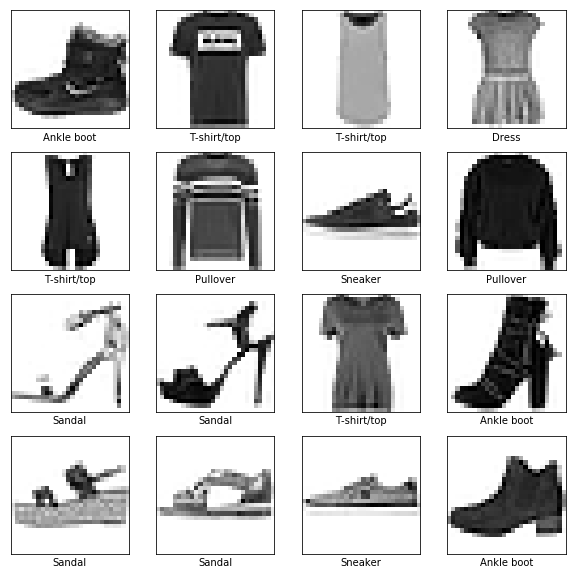

In [8]:
plt.figure(figsize = (10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[Y_train[i]])
plt.show()

### Making a basic model

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (X_train[0].shape)),
    tf.keras.layers.Dense(2**8, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [11]:
model.compile(optimizer = 'adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])

In [12]:
model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6131 - accuracy: 0.7866
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3734 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3263 - accuracy: 0.8806
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3051 - accuracy: 0.8878
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2798 - accuracy: 0.8956
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2747 - accuracy: 0.8984
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2527 - accuracy: 0.9055
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2435 - accuracy: 0.9086
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2337 - accuracy: 0.9126
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.225

In [15]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose = 2)

313/313 - 0s - loss: 0.3472 - accuracy: 0.8848


In [17]:
predictor = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [18]:
predictions = predictor.predict(X_test)

In [19]:
np.argmax(predictions[0])

9

In [20]:
Y_test[0]

9

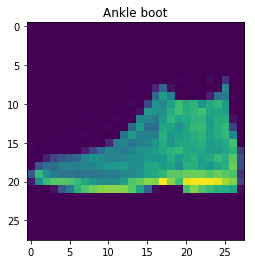

In [23]:
plt.imshow(X_test[0])
plt.title(class_names[Y_test[0]]);